# Best Practices for Scientific Computing

Summary of Best Practices, according to [[1]](http://dx.doi.org/10.1371/journal.pbio.1001745):

 1. Write programs for people, not computers.
 1. Let the computer do the work.
 1. Make incremental changes.
 1. Don't repeat yourself (or others).
 1. Plan for mistakes.
 1. Optimize software only after it works correctly.
 1. Document design and purpose, not mechanics.
 1. Collaborate.

[1]: *Best Practices for Scientific Computing*

Greg Wilson, D. A. Aruliah, C. Titus Brown, Neil P. Chue Hong, Matt Davis, Richard T. Guy, Steven H. D. Haddock, Kathryn D. Huff, Ian M. Mitchell, Mark D. Plumbley, Ben Waugh, Ethan P. White, Paul Wilson.

PLOS, http://dx.doi.org/10.1371/journal.pbio.1001745

# 1. Code Readability

## The Zen of Python

- Beautiful is better than ugly.
- Explicit is better than implicit.
- Simple is better than complex.
- Complex is better than complicated.
- Flat is better than nested.
- Sparse is better than dense.
- **Readability counts.**
- Special cases aren't special enough to break the rules.
- Although practicality beats purity.
- Errors should never pass silently.
- Unless explicitly silenced.
- In the face of ambiguity, refuse the temptation to guess.
- There should be one-- and preferably only one --obvious way to do it.
- Although that way may not be obvious at first unless you're Dutch.
- Now is better than never.
- Although never is often better than *right* now.
- If the implementation is hard to explain, it's a bad idea.
- If the implementation is easy to explain, it may be a good idea.
- Namespaces are one honking great idea -- let's do more of those!

## Variable/function names
 
Scientists often just translate their equations into code:
 
Bad:
```python
p0 = 3.5
p = p0 * np.cos(0.4 * x - 13.2 * t)
```

Better:
```python
# Constants:
base_pressure = 3.5  # Pa
wave_length = 15.7   # m
wave_number = 2 * np.pi / wave_length  # m-1
angular_frequency = 13.2  # Hz

# Calculate:
pressure = base_pressure * np.cos(wave_number * x - angular_frequency * t)
```

*If you have to sacrifice readability for performance reasons, make sure you add comments to explain the code.*

## Coding style.

This will vary from project to project, but a recommendation for a "default" style exists for Python, the [PEP 8](https://www.python.org/dev/peps/pep-0008/) (PEP = Python Enchancement Proposal). Several editors have functionality to give you hints for improving your style.

# 3. Use version control

Avoid this:

    mycode.py
    mycode_v2.py
    mycode_v2_conference.py
    mycode_v3_BROKEN.py
    mycode_v3_FIXED.py
    mycode_v2+v3.py

Instead use a version control system (VCS). There exist many alternatives, but the most common is to use *git* in combination with [github](github.com).

## What is version control?

 - A system to store history of files/folders.
 - Typically when you want to store a new version of your files, you make a *commit*.
 - A folder under version control is normally called a *repository*.

## Why use version control?

* Backups: 
    * Manage changes of files such as scripts, source code, documents, etc
    * Store copy of git repository on an external platform (e.g. github)
* Organization:  
    * Retrieve old versions of files.
    * Print history of changes.
* Collaboration:
   * Useful for programming or writing in teams.
   * Programmers work on *copies* of repository files and upload the changes to the official repository.
   * Non-conflicting modifications by different team members are merged automatically.
   * Conflicting modifications are detected and must be resolved manually.

## How does it work?

 - A simple repository will normally be a linear series of commits.
 - However, changes can also branch off, and be merged together.

## Commit flow

![Git commit flowchart](../reference/git-commits.svg)

## Branch flow

![Git branch flowchart](../reference/git-branches.svg)

## Non-software use

Version control can be used for more than just making software!

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('kM9zcfRtOqo')

## How do I use it?

If you want to use git, the base program is terminal based, and to unlock the most powerful features of git you will have to use it in this way. However, if you are just starting out, it might be a good idea to start out with a graphical interface, at least until you get the hang of the git flow.

Suggested graphical UIs:
 - Windows/Mac: [GitHub Desktop](https://desktop.github.com/)
 - Linux: [SmartGit](https://www.syntevo.com/smartgit/), [Git-cola](https://git-cola.github.io/) or [Gitg](https://wiki.gnome.org/Apps/Gitg/)

# 5. Use tools to automate testing

You will make mistakes when programming! Everyone does. The trick is in spotting the mistakes early and efficiently (after release/publication is normally undesirable).

Best tool available: Unit tests

## How to write unit tests

 1. Identify a *unit* in your program that should have a well defined behavior given a certain input. A unit can be a:
   - function
   - module
   - entire program
 1. Write a test function that calls this input and checks that the output/behavior is as expected
 1. The more the better! Preferably on several levels (function/module/program).

## How to write unit tests in Python

Use a test framework like [py.test](http://docs.pytest.org/en/latest/) or [nose](https://nose.readthedocs.io/en/latest/). Several other frameworks exist as well.

```bash
$ pip install pytest
```

Make a file `test_<unit or module name>.py`, preferably in a folder called `tests`.

Import the code to be tested.

Add a function `def test_<test name>():`, and have it check for the correct behavior given a certain input

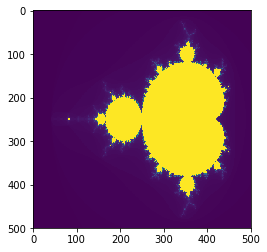

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mandlebrot import mandelbrot

x = np.linspace(-2.25, 0.75, 500)
y = np.linspace(-1.25, 1.25, 500)
output = mandelbrot(x, y, 200, False)

plt.imshow(output)

In [4]:
import numpy as np
from mandlebrot import mandelbrot

def test_mandelbrot_small():
    x = np.linspace(-2.25, 0.75, 10)
    y = np.linspace(-1.25, 1.25, 10)
    output = mandelbrot(x, y, 100, False)
    assert output.shape == (10, 10)

def test_mandelbrot_zero_outside():
    # The Mandelbrot set should be zero outside the "active" area
    x = np.linspace(1.5, 2.0, 10)
    y = np.linspace(1.5, 2.0, 10)
    output = mandelbrot(x, y, 100, False)
    assert np.all(output == 0.0)

def test_mandelbrot_incorrect_test():
    x = np.linspace(-1.5, -2.0, 10)
    y = np.linspace(-1.25, 1.25, 10)
    output = mandelbrot(x, y, 100, False)
    assert np.all(output == 0.0)
  

In [5]:
test_mandelbrot_small()

In [6]:
test_mandelbrot_zero_outside()

In [7]:
test_mandelbrot_incorrect_test()

AssertionError: 

## How to run tests

Call `py.test` or `nosetests` in the folder containing your project. The tools will look for anything that looks like a test (e.g. `test_*()` functions in `test_*.py` files) in your project.

In [8]:
!py.test

============================= test session starts ==============================
platform darwin -- Python 3.7.3, pytest-4.3.1, py-1.8.0, pluggy-0.9.0
rootdir: /Users/r599507/Programs/python-training/notebooks, inifile:
plugins: metadata-1.8.0, html-1.20.0, cov-2.6.1
collected 0 items                                                              

========================= no tests ran in 0.01 seconds =========================


## Utilities to express expected behavior

While `assert` and comparisons operators like `==`, `>` etc. should be able to express most expected behaviors, there are a few utilities that can greatly simplify tests, a few of these include:

### Numpy tests

In [9]:
small_noise = 1e-6 * np.random.rand(10, 10)
np.testing.assert_almost_equal(small_noise, 0.0, decimal=5)  # OK
np.testing.assert_almost_equal(small_noise, 0.0, decimal=7)  # Will likely fail

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatch: 86%
Max absolute difference: 9.97711978e-07
Max relative difference: inf
 x: array([[6.4184990e-07, 5.3737018e-07, 9.1302820e-07, 4.2630366e-07,
        2.6070558e-07, 5.4083240e-08, 9.9857548e-08, 9.4499906e-07,
        9.8723033e-07, 4.8151128e-07],...
 y: array(0.)

# Python modules

## Local modules

 - Previously, we have only written code to scripts or cells in Notebooks.
 - All python files can also be treated as modules, i.e. they can be imported in other Python files / Notebooks.
 - However, compared to scripts, modules typically only contain definitions (functions/classes/constants) meant to be imported somewhere else

Given a file `mymodule.py` with a function `my_function()`:

In [10]:
%%writefile mymodule.py

def my_function():
    return "Surprise!"


Writing mymodule.py


The function can then be imported in another file or a Notebook:

In [11]:
from mymodule import my_function

my_function()

'Surprise!'

## Packages

Modules and scripts can be organized into packages. These can then easily be distributed and imported by name. A set of built-in packages are included in Python, like:
* **sys** System specific functionality
* **os** Operating system specific functionality

Other packages can be downloaded and installed, e.g.
* **scipy** Scientific Python (www.scipy.org)
    * **numpy** Numerical Python
    * **ipython** Interactive Python
    * **matplotlib** Plotting
    * **pandas** Data analsyis

*Several useful packages are included in Python distributions like Anaconda*

## The Python Package Index (PyPI) collects a large number of modules

Official webpage https://pypi.python.org/pypi

Search the Python index with
```bash
pip search KEYWORD 
```
Install any new package with
```bash
pip install PACKAGENAME --user
````

# Final points

 - Before publishing/release: Get your code to run on another computer! Preferably on another platform.
 - When unit tests and version control is combined you can have tests be run automatically each time changes are pushed to the repository. This is called *continuous integration*.

# Challenges

 - Take your code from the previous heat equation diffusion task and make it into a module.
   - Put the reference implementation in one submodule, and the plotting code in a script that can be called.
 - Add it to a git repository.
 - Add unit tests that checks that the diffusion algorthim behaves as expected. Commit it to the repository.
 - Replace the Python code with the vectorized version, and commit that to the repository. Check that the vectorized version passes the test!
 - [Bonus] Turn your module into a package, and expose the callable script as a console entry point.